# International Sports Events: Window Dressing and Repression

In this assignment we will replicate partly a study on the relationship between repression in autocratic regimes and international sports events:
* [Scharpf, A., Gläßel, C., Pearce, E. (2022) *International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup*, American Political Science Review, 1-18.](https://www.cambridge.org/core/journals/american-political-science-review/article/abs/international-sports-events-and-repression-in-autocracies-evidence-from-the-1978-fifa-world-cup/19FA0D5B0DD55259AA6A3E4FEBB7978A). DOI: https://doi:10.1017/S0003055422000958




### Task 1: Overview
In order to make sure that we have the right data we will replicate Table SI.3.1 and SI.3.2 of the Supporting Information. In parallel we will replicate Figure 1 of the main paper and Figure SI.1.1 from the Supporting Information.


| Table_SI.3.1           | Table SI.3.2          |
|:-----------------------------:|:-----------------------------:|
| <img src=".\Markdown\Table_SI_3_1.png" alt="Table_SI_3_1" style="width: 85%">  |<img src=".\Markdown\Table_SI_3_2.png" alt='Table_SI_3_2' style="width: 100%">  |

| Figure 1              | Figure SI.1.1             |
|:-----------------------------:|:-----------------------------:|
|<img src=".\Markdown\Figure_1.png" alt="Figure 1" style="width: 100%">  | <img src=".\Markdown\Figure_SI_1_1.png" alt='Figure_SI_1_1' style="width: 80%">  |

### Setup - Library import
We import all the required local libraries.

In [1]:
# Data manipulation
import pandas as pd 
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

import statsmodels.api as sm
import statsmodels.formula.api as smf


import warnings

# Options 
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


###  Table SI.3.1

### Data import
We retrieve all the required data for the analysis of the first question.

In [2]:
df_ex1 = pd.read_stata(r'.\Datasets\main_data.dta')
df_ex1.head(3)

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,date,month_date,prewc_time3m,time,time2,time3,time_long,time2_long,time3_long,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,prox_hotelonly,prox_hotelonly_time,prox_hotelonly_time2,prox_hotelonly_time3,prox_hotelpress,prox_hotelpress_time,prox_hotelpress_time2,prox_hotelpress_time3,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,biweek1,biweek2,biweek3,biweek4,biweek5,biweek6,biweek7,biweek8,biweek9,biweek10,biweek11,biweek12,biweek13,biweek14,biweek15,hcXbiweek1,hcXbiweek2,hcXbiweek3,hcXbiweek4,hcXbiweek5,hcXbiweek6,hcXbiweek7,hcXbiweek8,hcXbiweek9,hcXbiweek10,hcXbiweek11,hcXbiweek12,hcXbiweek13,hcXbiweek14,hcXbiweek15,zone1,zone2,zone3,zone4,zone5,prov1,prov2,prov3,prov4,prov5,prov6,prov7,prov8,prov9,prov10,prov11,prov12,prov13,prov14,prov15,prov16,prov17,prov18,prov19,prov20,prov21,prov22,prov23,prov24,subzone1,subzone2,subzone3,subzone4,subzone5,subzone6,subzone7,subzone8,subzone9,subzone10,subzone11,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-01,1978-01-01,NaN,NaN,NaN,NaN,0.010,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-02,1978-01-01,NaN,NaN,NaN,NaN,0.020,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-03,1978-01-01,NaN,NaN,NaN,NaN,0.030,0.001,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN


In [3]:
df_ex1.shape

(133732, 126)

### Data Preprocessing

In a first look we observe that we have a NA values in "times" field, so we need to drop them. In parallel, we keep only the necessary field from the dataframe in order to replicate Table SI.3.1.

In [4]:
df_ex1 = df_ex1[df_ex1['time'].notna()]
table_si31=df_ex1[['repression','lnrepression','dumrepression','hostcity','prox_hotelonly','prox_hotelpress','time','time2','time3', 'lnpop_1970',  'literacy_avg','vote_frejuli','lnrebact1974','lnrepression70_77','latitude','lnstrikes','lnlag_strikes','lnlag2_strikes', 'zone1','zone2','zone3','zone4','zone5']]
stat=table_si31.describe()
table_t = stat.T[['count','mean','std','min','max']]

We have calculated some summary statistics for our dataset. Also, we need to map the fields from the dataset and rename the rows from the dataframe. 

In [5]:
# Changing index cols with rename()
table_t.rename(index = {"repression": "Repression events",
                    "lnrepression":"Repression events",
                    "dumrepression":"Repression events",
                    "hostcity":"Host City",
                    "prox_hotelonly":"Proximity to Hotel",
                    "prox_hotelpress":"Proximity to Journalist Venue",
                    "time":"Time",
                    "time2":"Time 2",
                    "time3":"Time 3",
                    "lnpop_1970":"Population Size",
                    "literacy_avg":"Literacy Rate",
                    "vote_frejuli":"Peronist Vote Share",
                    "lnrebact1974":"Rebel Activity",
                    "lnrepression70_77":"Past Repression",
                    "latitude":"Latitude",
                    "lnstrikes":"Protest Current month",
                    "lnlag_strikes":"Protest One month ago",
                    "lnlag2_strikes":"ProtestaTwo months ago",
                    "zone1":"Military Zone 1",
                    "zone2":"Military Zone 2",
                    "zone3":"Military Zone 3",
                    "zone4":"Military Zone 4",
                    "zone5":"Military Zone 5"},
                                 inplace = True)

# Changing columns with rename()
table_t.rename(columns = {'count':'Obs.','mean':'Mean',"std":"Std. dev.","min":"Min.","max":"Max."}, inplace = True)


# Declare a list that is to be converted into a column
types = ['Count', 'Continous', 'Binary', 'Binary','Continous','Continous','Count','Count','Count','Continous','Continous','Continous','Continous','Continous','Continous','Continous','Continous','Continous',' Binary',' Binary',' Binary',' Binary',' Binary' ]
  
# and equating it to the list
table_t = table_t.astype({'Obs.':'int'})

table_t.insert (0, "Type", types)
table_t

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58107,0.005,0.104,0.000,7.000
Repression events,Continous,58107,0.003,0.053,0.000,2.079
Repression events,Binary,58107,0.003,0.058,0.000,1.000
Host City,Binary,58383,0.010,0.100,0.000,1.000
Proximity to Hotel,Continous,58107,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,Continous,58107,7.079,1.629,0.000,9.398
Time,Count,58383,0.590,0.338,0.010,1.170
Time 2,Count,58383,0.462,0.411,0.000,1.369
Time 3,Count,58383,0.407,0.460,0.000,1.602
Population Size,Continous,56628,9.701,1.336,6.057,14.905


We observe that we have reproduced the Table SI.3.1. without deviations.

###  Table SI.3.2

### Data import
We retrieve all the required data for the analysis of the first question and the Table SI.3.2.

In [6]:
df_table2 = pd.read_stata(r'.\Datasets\main_data.dta')
df_table2 = df_table2[df_table2['postwc_time3mdum'].notna()]
df_table2.head()

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,date,month_date,prewc_time3m,time,time2,time3,time_long,time2_long,time3_long,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,prox_hotelonly,prox_hotelonly_time,prox_hotelonly_time2,prox_hotelonly_time3,prox_hotelpress,prox_hotelpress_time,prox_hotelpress_time2,prox_hotelpress_time3,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,biweek1,biweek2,biweek3,biweek4,biweek5,biweek6,biweek7,biweek8,biweek9,biweek10,biweek11,biweek12,biweek13,biweek14,biweek15,hcXbiweek1,hcXbiweek2,hcXbiweek3,hcXbiweek4,hcXbiweek5,hcXbiweek6,hcXbiweek7,hcXbiweek8,hcXbiweek9,hcXbiweek10,hcXbiweek11,hcXbiweek12,hcXbiweek13,hcXbiweek14,hcXbiweek15,zone1,zone2,zone3,zone4,zone5,prov1,prov2,prov3,prov4,prov5,prov6,prov7,prov8,prov9,prov10,prov11,prov12,prov13,prov14,prov15,prov16,prov17,prov18,prov19,prov20,prov21,prov22,prov23,prov24,subzone1,subzone2,subzone3,subzone4,subzone5,subzone6,subzone7,subzone8,subzone9,subzone10,subzone11,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
151,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-06-01,1978-06-01,93.000,0.930,0.865,0.804,1.520,2.310,3.512,0.000,0.000,0.000,0.000,0.000,0.000,6.274,5.835,5.426,5.047,6.274,5.835,5.426,5.047,0.000,0.010,0.000,0.000,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
152,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-06-02,1978-06-01,94.000,0.940,0.884,0.831,1.530,2.341,3.582,0.000,0.000,0.000,0.000,0.000,0.000,6.274,5.898,5.544,5.211,6.274,5.898,5.544,5.211,0.000,0.020,0.000,0.000,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
153,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-06-03,1978-06-01,95.000,0.950,0.902,0.857,1.540,2.372,3.652,0.000,0.000,0.000,0.000,0.000,0.000,6.274,5.960,5.662,5.379,6.274,5.960,5.662,5.379,0.000,0.030,0.001,0.000,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
154,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-06-04,1978-06-01,96.000,0.960,0.922,0.885,1.550,2.402,3.724,0.000,0.000,0.000,0.000,0.000,0.000,6.274,6.023,5.782,5.551,6.274,6.023,5.782,5.551,0.000,0.040,0.002,0.000,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

### Data Preprocessing

In a first look we observe that we have a NA values in "times" field, so we need to drop them. In parallel, we keep only the necessary field from the dataframe in order to replicate Table SI.3.2.

In [7]:
table_si32=df_table2[['repression','lnrepression','hostcity','postwc_time3mdum','time_postwc','time2_postwc','time3_postwc','lnpop_1970','vote_frejuli','literacy_avg','lnrebact1974','lnrepression70_77','zone1','zone2','zone3','zone4','zone5']]
stat2=table_si32.describe()
table_t2 = stat2.T[['count','mean','std','min','max']]
table_t2

,count,mean,std,min,max
repression,58321.000,0.004,0.096,0.000,9.000
lnrepression,58321.000,0.002,0.047,0.000,2.303
hostcity,58383.000,0.010,0.100,0.000,1.000
postwc_time3mdum,58383.000,0.786,0.410,0.000,1.000
time_postwc,58383.000,0.590,0.338,0.010,1.170
time2_postwc,58383.000,0.462,0.411,0.000,1.369
time3_postwc,58383.000,0.407,0.460,0.000,1.602
lnpop_1970,56628.000,9.701,1.336,6.057,14.905
vote_frejuli,57447.000,58.752,11.539,28.500,94.300
literacy_avg,56628.000,0.717,0.110,0.316,0.901


In [8]:
# Changing index cols with rename()
table_t2.rename(index = {"repression": "Repression events",
                    "lnrepression":"Repression events",
                    "hostcity":"Host City",
                    "postwc_time3mdum":"Post World Cup Period",
                    "time_postwc":"Time Post World Cup",
                    "time2_postwc":"Time 2 Post World Cup",
                    "time3_postwc":"Time 3 Post World Cup",
                    "lnpop_1970":"Population Size",
                    "literacy_avg":"Literacy Rate",
                    "vote_frejuli":"Peronist Vote Share",
                    "lnrebact1974":"Rebel Activity",
                    "lnrepression70_77":"Past Repression",
                    "zone1":"Military Zone 1",
                    "zone2":"Military Zone 2",
                    "zone3":"Military Zone 3",
                    "zone4":"Military Zone 4",
                    "zone5":"Military Zone 5"},
                                 inplace = True)

# Changing columns with rename()
table_t2.rename(columns = {'count':'Obs.','mean':'Mean',"std":"Std. dev.","min":"Min.","max":"Max."}, inplace = True)


# Declare a list that is to be converted into a column
types = ['Count', 'Continous', 'Binary', 'Binary','Count','Count','Count','Continous','Continous','Continous','Continous','Continous',' Binary',' Binary',' Binary',' Binary',' Binary' ]
  
# and equating it to the list
table_t2 = table_t2.astype({'Obs.':'int'})

table_t2.insert (0, "Type", types)
table_t2

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58321,0.004,0.096,0.000,9.000
Repression events,Continous,58321,0.002,0.047,0.000,2.303
Host City,Binary,58383,0.010,0.100,0.000,1.000
Post World Cup Period,Binary,58383,0.786,0.410,0.000,1.000
Time Post World Cup,Count,58383,0.590,0.338,0.010,1.170
Time 2 Post World Cup,Count,58383,0.462,0.411,0.000,1.369
Time 3 Post World Cup,Count,58383,0.407,0.460,0.000,1.602
Population Size,Continous,56628,9.701,1.336,6.057,14.905
Peronist Vote Share,Continous,57447,58.752,11.539,28.500,94.300
Literacy Rate,Continous,56628,0.717,0.110,0.316,0.901


### Figure 1.1

### Data import
We retrieve all the required data for the analysis of the first question and the Figure 1.

In [9]:
data_fig1 = pd.read_stata(r'.\Datasets\figure_1_data.dta')
data_fig1

,postcwy,event_selec,autochost,autochostperc
0,1.000,25.000,2.000,8.000
1,2.000,31.000,4.000,12.903
2,3.000,25.000,5.000,20.000
3,4.000,24.000,6.000,25.000
4,5.000,30.000,6.000,20.000
5,6.000,32.000,9.000,28.125
6,7.000,27.000,10.000,37.037


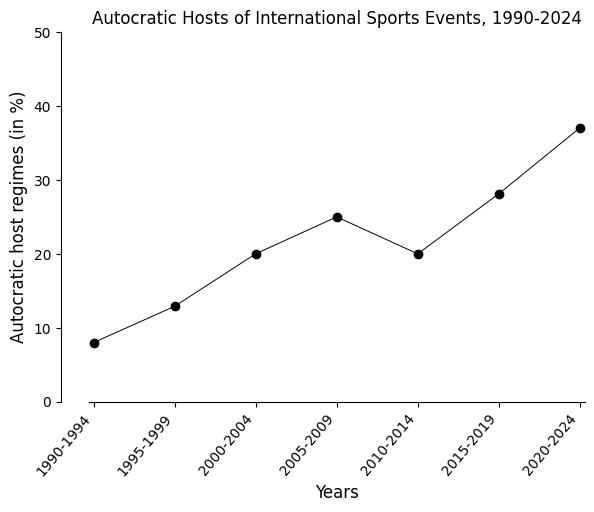

In [10]:
fig, ax = plt.subplots()



ax.set_xlabel('Years', fontsize=12,color='black')
ax.set_ylabel('Autocratic host regimes (in %)', fontsize=12, color='black')
ax.set_xticks([0,1, 2, 3,4,5,6])

labels = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024']
ax.set_xticklabels(labels, rotation=50, ha='right')

ax.plot(labels,data_fig1['autochostperc'],'-o', color='black', linewidth='0.7')
ax.spines['left'].set_position(('outward', 20))

plt.title('Autocratic Hosts of International Sports Events, 1990-2024')
plt.ylim(0, 50)
plt.xlim(-0.06,6.06)

sns.despine()

plt.show()

The above graph shows the five-year shares of autocratic states
among all hosting nations of the world championships in athletics,
basketball, cricket, football, handball, ice hockey, rugby, table
tennis, and volleyball, as well as the Summer and Winter
Olympics. We observe that the share of autocracies among host nations has risen
from 8% after the end of the Cold War to 37% in 2020. To autocratic regimes, international sports events offer
outstanding opportunities but also pose serious risks.

### Figure SI.1.1

### Data import
We retrieve all the required data for the analysis of the first question and the Figure SI.1.1.

In [11]:
df_s1 = pd.read_stata(r'.\Datasets\figure_SI11_data.dta')
df_s1.head()

,year,regime,baseline,democ,autoc
0,1987.000,0.000,2.500,3.000,NaN
1,1987.000,0.000,2.500,3.000,NaN
2,1991.000,0.000,2.500,3.000,NaN
3,1991.000,0.000,2.500,3.000,NaN
4,1995.000,1.000,2.500,NaN,2.000


### Data Preprocessing

The field baseline from our dataset represents the Sport event / tournament based on a specific number code. 

In [12]:
baseline_tournament = {'2.5': "Rugby World Cup",
                       '5.0': "Winter Olympic Games",
                       '7.5': "Summer Olympic Games",
                      '10.0': "World Athletics Championships",
                      '12.5': "Ice Hockey World Championships",
                      '15.0': "FIFA World Cup",
                      '17.5': "Cricket World Cup",
                      '20.0': "World Handball Championship",
                      '22.5': "World Table Tennis Championships",
                      '25.0': "Basketball World Cup",
                      '27.5': "Volleyball World Championship"}

df_s1['baseline'] = df_s1['baseline'].astype(str)
df_s1['tournament'] = df_s1['baseline'].replace(baseline_tournament)
df_s1['year'] = df_s1['year'].astype(int)
df_s1.head()

,year,regime,baseline,democ,autoc,tournament
0,1987,0.000,2.5,3.000,NaN,Rugby World Cup
1,1987,0.000,2.5,3.000,NaN,Rugby World Cup
2,1991,0.000,2.5,3.000,NaN,Rugby World Cup
3,1991,0.000,2.5,3.000,NaN,Rugby World Cup
4,1995,1.000,2.5,NaN,2.000,Rugby World Cup


The field "regime" represents whether a regime is democratic or autocratic, so we create two new columns to separate them based on their values with a binary format. 

In [13]:
df_s1['democ_binary'] = np.where(df_s1["regime"]==0, 1, 0)
df_s1['auto_binary'] = np.where(df_s1["regime"]!=0, 1, 0)
df_s1.head()

,year,regime,baseline,democ,autoc,tournament,democ_binary,auto_binary
0,1987,0.000,2.5,3.000,NaN,Rugby World Cup,1,0
1,1987,0.000,2.5,3.000,NaN,Rugby World Cup,1,0
2,1991,0.000,2.5,3.000,NaN,Rugby World Cup,1,0
3,1991,0.000,2.5,3.000,NaN,Rugby World Cup,1,0
4,1995,1.000,2.5,NaN,2.000,Rugby World Cup,0,1


After that we create two subtables which include the original table with a pivot by year for each tournament.

In [14]:
subtable1 = pd.pivot_table(df_s1, values='democ_binary', index=['tournament'], columns=['year'], aggfunc=np.sum).fillna(0)

subtable1 = subtable1.transform(lambda x: np.where(x==0, x, x.name))
subtable1 = subtable1.reindex(df_s1['tournament'].unique())

subtable1.head()

year,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rugby World Cup,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1987.000,0.000,0.000,0.000,1991.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1999.000,0.000,0.000,0.000,2003.000,0.000,0.000,0.000,2007.000,0.000,0.000,0.000,2011.000,0.000,0.000,0.000,2015.000,0.000,0.000,0.000,2019.000,0.000,0.000,0.000,2023.000,0.000
Winter Olympic Games,0.000,1948.000,0.000,0.000,0.000,1952.000,0.000,0.000,0.000,1956.000,0.000,0.000,0.000,1960.000,0.000,0.000,0.000,1964.000,0.000,0.000,0.000,1968.000,0.000,0.000,0.000,1972.000,0.000,0.000,0.000,1976.000,0.000,0.000,0.000,1980.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1988.000,0.000,0.000,0.000,1992.000,0.000,1994.000,0.000,0.000,0.000,1998.000,0.000,0.000,0.000,2002.000,0.000,0.000,0.000,2006.000,0.000,0.000,0.000,2010.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2018.000,0.000,0.000,0.000,0.000,0.000,0.000
Summer Olympic Games,0.000,1948.000,0.000,0.000,0.000,1952.000,0.000,0.000,0.000,1956.000,0.000,0.000,0.000,1960.000,0.000,0.000,0.000,1964.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1972.000,0.000,0.000,0.000,1976.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1984.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1992.000,0.000,0.000,0.000,1996.000,0.000,0.000,0.000,2000.000,0.000,0.000,0.000,2004.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2012.000,0.000,0.000,0.000,2016.000,0.000,0.000,0.000,2020.000,0.000,0.000,0.000,2024.000
World Athletics Championships,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1983.000,0.000,0.000,0.000,1987.000,0.000,0.000,0.000,1991.000,0.000,1993.000,0.000,1995.000,0.000,1997.000,0.000,1999.000,0.000,2001.000,0.000,2003.000,0.000,2005.000,0.000,2007.000,0.000,2009.000,0.000,2011.000,0.000,0.000,0.000,0.000,0.000,2017.000,0.000,0.000,0.000,0.000,2022.000,0.000,0.000
Ice Hockey World Championships,0.000,1948.000,1949.000,1950.000,1951.000,1952.000,1953.000,1954.000,1955.000,1956.000,0.000,1958.000,0.000,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,0.000,1967.000,1968.000,1969.000,1970.000,1971.000,0.000,0.000,1974.000,1975.000,0.000,1977.000,0.000,0.000,0.000,1981.000,1982.000,1983.000,0.000,0.000,0.000,1987.000,0.000,1989.000,1990.000,1991.000,1992.000,1993.000,1994.000,1995.000,1996.000,1997.000,1998.000,1999.000,0.000,2001.000,2002.000,2003.000,2004.000,2005.000,2006.000,0.000,2008.000,2009.000,2010.000,2011.000,2012.000,2013.000,0.000,2015.000,0.000,2017.000,2018.000,2019.000,2020.000,2021.000,2022.000,0.000,2024.000


In [15]:
subtable2 = pd.pivot_table(df_s1, values='auto_binary', index=['tournament'], columns=['year'], aggfunc=np.sum).fillna(0)

subtable2 = subtable2.transform(lambda x: np.where(x==0, x, x.name))
subtable2 = subtable2.reindex(df_s1['tournament'].unique())

subtable2.head()

year,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rugby World Cup,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1995.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Winter Olympic Games,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1984.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2014.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2022.000,0.000,0.000
Summer Olympic Games,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1968.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1980.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1988.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2008.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
World Athletics Championships,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2013.000,0.000,2015.000,0.000,0.000,0.000,2019.000,0.000,0.000,0.000,2023.000,0.000
Ice Hockey World Championships,1947.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1957.000,0.000,1959.000,0.000,0.000,0.000,0.000,0.000,0.000,1966.000,0.000,0.000,0.000,0.000,0.000,1972.000,1973.000,0.000,0.000,1976.000,0.000,1978.000,1979.000,0.000,0.000,0.000,0.000,0.000,1985.000,1986.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2000.000,0.000,0.000,0.000,0.000,0.000,0.000,2007.000,0.000,0.000,0.000,0.000,0.000,0.000,2014.000,0.000,2016.000,0.000,0.000,0.000,0.000,2021.000,0.000,2023.000,0.000


In [16]:
baseline_tournament_len = 11
widths = np.full(baseline_tournament_len, 3)

In [17]:
spines_1 = np.arange(0, 44, 4, dtype=int)
spines_2 = np.arange(1, 45, 4, dtype=int)

In [18]:
spines_1

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40])

In [19]:
spines_2

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41])

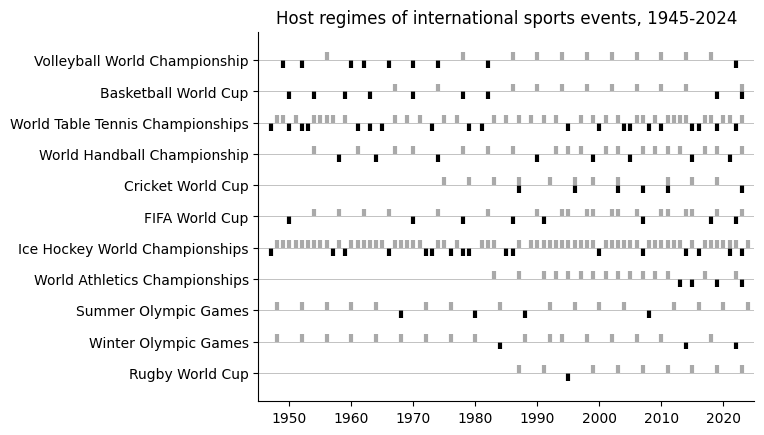

In [20]:
fig, ax= plt.subplots()

color_1 = ['black' for i in range(baseline_tournament_len)]
color_2 = ['darkgray' for i in range(baseline_tournament_len)]

ax.eventplot(subtable2.values, linewidths=widths, lineoffsets=spines_1, colors=color_1)
ax.eventplot(subtable1.values, linewidths=widths, lineoffsets=spines_2, colors=color_2)

# Add a line for every tournament in y axis 
[ax.axhline(y=i-0.5, linewidth=0.5, color='darkgray') for i in spines_2]   


ax.set_xlim(1945, 2025)

ax.set_yticks(spines_2 - 0.5)
ax.set_yticklabels(list(subtable1.index))

# Remove borders
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


ax.set_title('Host regimes of international sports events, 1945-2024')

plt.show()

The above figure shows all host regimes of the
most prominent international sports events since 1945. Black and grey spikes indicate
autocratic and democratic host regimes, respectively. Autocratic host regimes comprise closed and electoral
autocracies, democratic host regimes consist of electoral and liberal democracies. Sports events are ordered according to the share of autocratic hosts from highest
(top) to lowest (bottom).

### Task 2: Repression in Departments with and without Host Cities

The authors formulate two hypotheses:

* H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

* H2: During an international sports tournament, state repression drops in host cities but remains unchanged in other cities.

They validate their hypotheses using a series of regression analyses. They use negative binomial regression models, but they find that their findings are robust with Ordinary Least Squares (OLS), so we'll use OLS in this analysis.

We will run the three first models of Table 1 of the main paper, which correpond to columns (1)-(3). We can find a partial report of the results in Table SI.4.1 of the Supporting Information.

| Table_1         | Table SI.4.1          |
|:-----------------------------:|:-----------------------------:|
| <img src=".\Markdown\Table_1.png" alt="Table_1" style="width: 100%">  |<img src=".\Markdown\Table_SI_4_1.png" alt='Table_SI_4_1' style="width: 100%">  |

### Data import
We retrieve all the required data for the analysis of the second question.

In [21]:
df_ex2 = pd.read_stata(r'.\Datasets\main_data.dta')
df_ex2.head()

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,date,month_date,prewc_time3m,time,time2,time3,time_long,time2_long,time3_long,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,prox_hotelonly,prox_hotelonly_time,prox_hotelonly_time2,prox_hotelonly_time3,prox_hotelpress,prox_hotelpress_time,prox_hotelpress_time2,prox_hotelpress_time3,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,biweek1,biweek2,biweek3,biweek4,biweek5,biweek6,biweek7,biweek8,biweek9,biweek10,biweek11,biweek12,biweek13,biweek14,biweek15,hcXbiweek1,hcXbiweek2,hcXbiweek3,hcXbiweek4,hcXbiweek5,hcXbiweek6,hcXbiweek7,hcXbiweek8,hcXbiweek9,hcXbiweek10,hcXbiweek11,hcXbiweek12,hcXbiweek13,hcXbiweek14,hcXbiweek15,zone1,zone2,zone3,zone4,zone5,prov1,prov2,prov3,prov4,prov5,prov6,prov7,prov8,prov9,prov10,prov11,prov12,prov13,prov14,prov15,prov16,prov17,prov18,prov19,prov20,prov21,prov22,prov23,prov24,subzone1,subzone2,subzone3,subzone4,subzone5,subzone6,subzone7,subzone8,subzone9,subzone10,subzone11,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-01,1978-01-01,NaN,NaN,NaN,NaN,0.010,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-02,1978-01-01,NaN,NaN,NaN,NaN,0.020,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-03,1978-01-01,NaN,NaN,NaN,NaN,0.030,0.001,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-04,1978-01-01,NaN,NaN,NaN,NaN,0.040,0.002,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-05,1978-01-01,NaN,NaN,NaN,NaN,0.050,0.003,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50

### Data Preprocessing

In a first look we observe that we have a NA values in "times" and "lnrepression" fields, so we need to drop them. 

In [22]:
df_model1 = df_ex2[df_ex2['time'].notna()]
df_model1 = df_model1[df_model1['lnrepression'].notna()]

In [23]:
df_model1.shape

(58107, 126)

**Introduction**:

We will use Python’s statsmodels module to implement Ordinary Least Squares(OLS) method of linear regression. 

A linear regression model establishes the relation between a dependent variable(y) and at least one independent variable(x) as:

$$\hat{y}=b_{1}x+b_{0}$$

In OLS method, we have to choose the values of $b_{1}$  and $b_{0}$  such that, the total sum of squares of the difference between the calculated and observed values of y, is minimised. 

$$ S= \sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^{2} \ = \sum_{i=1}^{n}(y_{i}-b_{1}x_{1}-b_{0})^{2} \ = \sum_{i=1}^{n}(\hat{\epsilon})^{2} \ = min$$

Where:

* $\hat{y_{i}} =$ predicted value for the ith observation 
* $y_{i} =$ actual value for the ith observation 
* $\hat{\epsilon} =$ error/residual for the ith observation 
* $n =$ total number of observations

To get the values of $b_{0}$  and $b_{1}$  which minimise $S$, we can take a partial derivative for each coefficient and equate it to zero.

**Approach** :

* First we define the variables $x$ (independent variable) and $y$ (the variable which is dependent on x). 
* Next, We need to add the constant $b_0$  to the equation using the add_constant() method.
* The **OLS()** function of the **statsmodels.api** module is used to perform OLS regression. It returns an OLS object. Then fit() method is called on this object for fitting the regression line to the data.
* The **summary()** method is used to obtain a table which gives an extensive description about the regression results

### Table SI.4.1: Model 1

In [24]:
X= df_model1[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2']] 
Y= df_model1['lnrepression']
X = sm.add_constant(X)

model1 = sm.OLS(Y, X).fit(cov_type="HC1")
model1.params

const            0.003
hostcitytime     0.401
hostcitytime2   -0.323
hostcity         0.020
time            -0.003
time2            0.002
dtype: float64

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.90
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.31e-13
Time:                        14:19:55   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0026      0.001      4.027      0.000       0.001       0.004
hostcitytime      0.4012      0.144      2.780      0.005       0.118       0.684
hostcitytime2    -0.3230      0.110     -2.923      0.003      -0.540      -0.106
hostcity          0.0202      0.034      0.591      0.554      -0.047       0.087
time             -0.0028      0.002     -1.233      0.218      -0.007       0.002
time2             0.0020      0.002      1.132      0.258      -0.001       0.006
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921402.321
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Description of some of the terms in the summary table: 

* **R-squared** : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
* **Adj. R-squared** : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.
* **F-statistic** : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
* **coef** : the coefficients of the independent variables and the constant term in the equation.
* **t** : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

We observe that we replicate the Model 1 from the Table SI.4.1, below we compare our result with the corresponding results of Table SI.4.1 .

|Parameters Results | Parameters   |Table SI.4.1: Model 1         | Our Approach: Model 1        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time | 0.401 | 0.4012 |
|std err|  Host City * Time | 0.144| 0.144 |
|coef|  Host City * Time2 | −0.323 | -0.3230 |
|std err|  Host City * Time2 |0.110| 0.110	 |
|coef|  Host City |  0.020  | 0.0202 |
|std err|  Host City |0.034| 0.034	 |
|coef|  Time |  −0.003   | -0.0028	 |
|std err|  Time |0.002| 0.002	 |
|coef|  Time2 |  0.002   | 0.0020 |
|std err|  Time2 |0.002| 0.002	 |
|coef|  Constant |  0.003  | 0.0026 |
|std err|  Constant |0.001| 0.001 |


|Results |Table SI.4.1: Model 1         | Our Approach: Model 1        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|F statistic|  13.90 | 13.90 |
|$R^2$ |  0.05 | 0.046 |
|Observations|  58107 | 58107 |



### Table SI.4.1: Model 2

With the same methodology we will replicate Model 2 of Table SI.4.1. 

In [26]:
# Drop NA values
df_model2 = df_ex2[df_ex2['time'].notna()]
df_model2 = df_model2[df_model2['lnrepression'].notna()]
df_model2 = df_model2[df_model2['lnpop_1970'].notna()]
df_model2 = df_model2[df_model2['vote_frejuli'].notna()]
df_model2 = df_model2[df_model2['literacy_avg'].notna()]

# Initialize X and Y
X_model2= df_model2[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77']] 
Y_model2= df_model2['lnrepression']

# Add Constanst 
X_model2 = sm.add_constant(X_model2)
model2 = sm.OLS(Y_model2, X_model2).fit(cov_type="HC1")
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     17.56
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.16e-32
Time:                        14:19:56   Log-Likelihood:                 86804.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56383   BIC:                        -1.735e+05
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0041      0.002     -2.056      0.040      -0.008      -0.000
hostcitytime          0.4014      0.143      2.801      0.005       0.121       0.682
hostcitytime2        -0.3231      0.110     -2.945      0.003      -0.538      -0.108
hostcity             -0.0037      0.034     -0.109      0.913      -0.070       0.063
time                 -0.0030      0.002     -1.297      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
lnpop_1970            0.0010      0.000      4.623      0.000       0.001       0.001
vote_frejuli       -3.22e-05   1.86e-05     -1.727      0.084   -6.87e-05    4.34e-06
literacy_avg         -0.0056      0.001     -5.192      0.000      -0.008      -0.003
lnrebact1974         -0.0001      0.000     -0.939      0.348      -0.000       0.000
lnrepression70_77     0.0041      0.000     10.816      0.000       0.003       0.005
==============================================================================
Omnibus:                   119962.002   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        462693283.096
Skew:                          18.965   Prob(JB):                         0.00
Kurtosis:                     445.123   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We observe that we replicate the Model 2 from the Table SI.4.1, below we compare our result with the corresponding results of Table SI.4.1 .

|Parameters Results | Parameters   |Table SI.4.1: Model 2         | Our Approach: Model 2        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time | 0.401 | 0.4014 |
|std err|  Host City * Time | 0.143| 0.143 |
|coef|  Host City * Time2 | −0.323 | -0.3231 |
|std err|  Host City * Time2 |0.110| 0.110			 |
|coef|  Host City |  0.004 |-0.0037	 |
|std err|  Host City |0.034| 0.034	 |
|coef|  Time |  −0.003   | -0.0028	 |
|std err|  Time |0.002| 0.002	 |
|coef|  Time2 |  0.002   | 0.0022 |
|std err|  Time2 |0.002| 0.002	 |
|coef|  Constant |  -0.004  | -0.0041|
|std err|  Constant |0.002| 0.002 |


|Results |Table SI.4.1: Model 1         | Our Approach: Model 1        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|F statistic|  17.56 | 17.56 |
|$R^2$|  0.06 | 0.059 |
|Observations|  56394 | 56394 |

### Table 1: Model 3

With the same methodology we will replicate Model 3 of Table SI.4.1. 

In [27]:
df_model3 = df_ex2[df_ex2['time'].notna()]
df_model3 = df_model3[df_model3['lnrepression'].notna()]
df_model3 = df_model3[df_model3['lnpop_1970'].notna()]
df_model3 = df_model3[df_model3['vote_frejuli'].notna()]
df_model3 = df_model3[df_model3['literacy_avg'].notna()]

X_model3= df_model3[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5']] 
Y_model3= df_model3['lnrepression']

X_model3 = sm.add_constant(X_model3)
model3 = sm.OLS(Y_model3, X_model3).fit(cov_type="HC1")

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.72e-31
Time:                        14:19:56   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0039      0.002     -1.660      0.097      -0.009       0.001
hostcitytime          0.4014      0.142      2.825      0.005       0.123       0.680
hostcitytime2        -0.3231      0.109     -2.969      0.003      -0.536      -0.110
hostcity             -0.0040      0.034     -0.120      0.905      -0.070       0.062
time                 -0.0030      0.002     -1.296      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
lnpop_1970            0.0033      0.000      7.884      0.000       0.002       0.004
vote_frejuli       1.047e-05   2.41e-05      0.434      0.664   -3.68e-05    5.78e-05
literacy_avg         -0.0231      0.002     -9.286      0.000      -0.028      -0.018
lnrebact1974         -0.0014      0.000     -6.792      0.000      -0.002      -0.001
lnrepression70_77     0.0032      0.000      8.267      0.000       0.002       0.004
zone2                -0.0147      0.002     -9.506      0.000      -0.018      -0.012
zone3                -0.0117      0.001     -9.012      0.000      -0.014      -0.009
zone4                -0.0082      0.004     -2.171      0.030      -0.016      -0.001
zone5                -0.0092      0.001     -9.207      0.000      -0.011      -0.007
==============================================================================
Omnibus:                   119662.654   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456844777.801
Skew:                          18.855   Prob(JB):                         0.00
Kurtosis:                     442.318   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We observe that we replicate the Model 3 from the Table SI.4.1, below we compare our result with the corresponding results of Table SI.4.1.

|Parameters Results | Parameters   |Table SI.4.1: Model 3         | Our Approach: Model 3        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time | 0.401 | 0.4014 |
|std err|  Host City * Time | 0.142| 0.142 |
|coef|  Host City * Time2 | −0.323 | -0.3231 |
|std err|  Host City * Time2 |0.109| 0.109			 |
|coef|  Host City |  0.004 |-0.0040	 |
|std err|  Host City |0.034| 0.034	 |
|coef|  Time |  −0.003   | -0.0030		 |
|std err|  Time |0.002| 0.002	 |
|coef|  Time2 |  0.002   | 0.0022 |
|std err|  Time2 |0.002| 0.002	 |
|coef|  Constant |  -0.004  | -0.0039|
|std err|  Constant |0.002| 0.002 |


|Results |Table SI.4.1: Model 3         | Our Approach: Model 3        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|F statistic|  12.96 | 12.96 |
|$R^2$ |   0.06 | 0.063|
|Observations|   56394 | 56394 |

According to our analysis, we coclude that coefficient of the interaction term between Host City and
Time is positive and statistically significant across specifications, lending additional
support to Hypothesis 1.  Likewise, the coefficient of the interaction term between Host
City and Time2
is negative and statistically significant across all model specifications,
which offers further support to Hypothesis 2. Together, our findings remain consistent
across different regression methods and specifications. 

### Task 3: Graphical Overview of Effects 

For the third question we will replicate Figure 5 of the main paper using our own model. Moreover, we enrich the figure by plotting also relevant information from the actual data (not predictions).

<img src=".\Markdown\Figure_5.png" alt="Figure 5" style="width: 85%"/>


### Data import
We retrieve all the required data for the analysis of the third question.

In [28]:
df_ex3 = pd.read_stata(r'.\Datasets\main_data.dta')
df_ex3.head()

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,date,month_date,prewc_time3m,time,time2,time3,time_long,time2_long,time3_long,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,prox_hotelonly,prox_hotelonly_time,prox_hotelonly_time2,prox_hotelonly_time3,prox_hotelpress,prox_hotelpress_time,prox_hotelpress_time2,prox_hotelpress_time3,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,biweek1,biweek2,biweek3,biweek4,biweek5,biweek6,biweek7,biweek8,biweek9,biweek10,biweek11,biweek12,biweek13,biweek14,biweek15,hcXbiweek1,hcXbiweek2,hcXbiweek3,hcXbiweek4,hcXbiweek5,hcXbiweek6,hcXbiweek7,hcXbiweek8,hcXbiweek9,hcXbiweek10,hcXbiweek11,hcXbiweek12,hcXbiweek13,hcXbiweek14,hcXbiweek15,zone1,zone2,zone3,zone4,zone5,prov1,prov2,prov3,prov4,prov5,prov6,prov7,prov8,prov9,prov10,prov11,prov12,prov13,prov14,prov15,prov16,prov17,prov18,prov19,prov20,prov21,prov22,prov23,prov24,subzone1,subzone2,subzone3,subzone4,subzone5,subzone6,subzone7,subzone8,subzone9,subzone10,subzone11,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-01,1978-01-01,NaN,NaN,NaN,NaN,0.010,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-02,1978-01-01,NaN,NaN,NaN,NaN,0.020,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-03,1978-01-01,NaN,NaN,NaN,NaN,0.030,0.001,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-04,1978-01-01,NaN,NaN,NaN,NaN,0.040,0.002,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-05,1978-01-01,NaN,NaN,NaN,NaN,0.050,0.003,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50

In [29]:
# Drop NA values
df_ex3 = df_ex3[df_ex3['time'].notna()]
df_ex3 = df_ex3[df_ex3['lnrepression'].notna()]

We create two different sub-dataset for Host Cities and fot Other Cities.

In [30]:
df_hostcity= df_ex3[df_ex3.hostcity==1]
df_othercity = df_ex3[df_ex3.hostcity==0]

We build our model using the below parameters:
('hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5').

In [31]:
df_hostcity = df_hostcity[df_hostcity['lnpop_1970'].notna()]
df_hostcity = df_hostcity[df_hostcity['vote_frejuli'].notna()]
df_hostcity = df_hostcity[df_hostcity['literacy_avg'].notna()]

X_hostcity= df_hostcity[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5']] 
Y_hostcity= df_hostcity['repression']

X_hostcity = sm.add_constant(X_hostcity,has_constant='add')
model = sm.OLS(Y_hostcity, X_hostcity).fit(cov_type="HC1")
model.summary()

C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
C:\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     9.565
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.84e-11
Time:                        14:19:58   Log-Likelihood:                -542.15
No. Observations:                 585   AIC:                             1098.
Df Residuals:                     578   BIC:                             1129.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0096      0.004     -2.248      0.025      -0.018      -0.001
hostcitytime          0.4481      0.134      3.336      0.001       0.185       0.711
hostcitytime2        -0.3536      0.105     -3.382      0.001      -0.559      -0.149
hostcity             -0.0096      0.004     -2.248      0.025      -0.018      -0.001
time                  0.4481      0.134      3.336      0.001       0.185       0.711
time2                -0.3536      0.105     -3.382      0.001      -0.559      -0.149
lnpop_1970            0.0837      0.019      4.334      0.000       0.046       0.122
vote_frejuli         -0.0373      0.006     -6.007      0.000      -0.050      -0.025
literacy_avg         -0.0064      0.004     -1.704      0.088      -0.014       0.001
lnrebact1974         -0.0209      0.018     -1.183      0.237      -0.056       0.014
lnrepression70_77     0.1296      0.028      4.579      0.000       0.074       0.185
zone2                 0.0666      0.024      2.720      0.007       0.019       0.115
zone3                -0.0698      0.021     -3.397      0.001      -0.110      -0.030
zone4                      0          0        nan        nan           0           0
zone5                      0          0        nan        nan           0           0
==============================================================================
Omnibus:                      570.226   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23447.849
Skew:                           4.348   Prob(JB):                         0.00
Kurtosis:                      32.772   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the same dataset we use the model that we train before and we make prediction.

In [32]:
predict = model.predict(X_hostcity)

In [33]:
predict = predict.to_frame()
predict.index.name = 'index'
predict.rename(columns={predict.columns[0]:'predict'}, inplace=True)
X_test = X_hostcity['time'].to_frame()
X_test.index.name = 'index'
data = pd.merge(X_test, predict, left_on='index', right_on='index',how="inner")
data.head()

,time,predict
index,,
11583,0.010,-0.099
11584,0.020,-0.090
11585,0.030,-0.082
11586,0.040,-0.073
11587,0.050,-0.065


In [34]:
data=data.groupby('time').mean()
data = data.reset_index()
data.head(2)

,time,predict
0,0.010,0.007
1,0.020,0.016


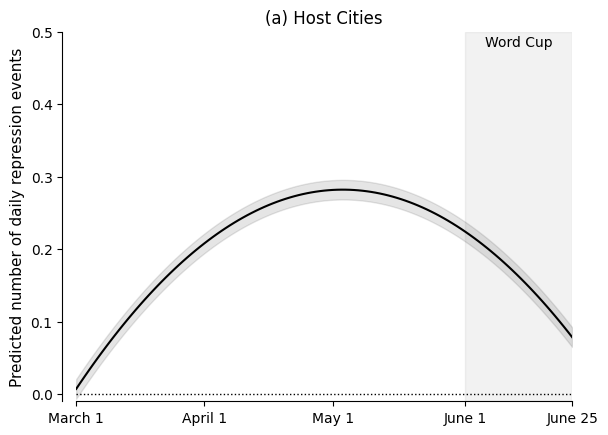

In [35]:
ax = sns.lineplot(data=data, x="time", y="predict",ci=None,color='black')
ax.set_ylim(-0.01, 0.5)
ax.set_xlim(0.01, 1.17)

ax.axvspan(0.92, 1.17, alpha=0.1, color='grey')
plt.text(.96, .99, 'Word Cup', ha='right', va='top', transform=ax.transAxes, fontsize ='medium')

#specify x-axis locations
x_ticks = [0.01, 0.31, 0.61, 0.92, 1.17]
#specify x-axis labels
x_labels = ['March 1', 'April 1', 'May 1', 'June 1', 'June 25'] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set_ylabel(r'Predicted number of daily repression events', fontsize=11)
ax.set_xlabel(r'', fontsize=1)
plt.title("(a) Host Cities")

ax.spines['left'].set_position(('outward', 10))
plt.axhline(y=0.0, xmin=0.0,xmax=1.17, color='black', linestyle='dotted', linewidth=1)

#some confidence interval
ci = 1.95 * np.std(data['predict'])/np.sqrt(len(data['time']))

ax.fill_between(data['time'], (data['predict']-ci), (data['predict']+ci), color='black', alpha=.1)

sns.despine()


Graph shows predicted numbers of daily repression events in departments with host cities. Calculations are based on interaction effects of Model 3, Table 1, with control variables held at observed values. Shading around
lines gives 95% confidence intervals. Furthemore, in line with Hypothesis 1, the figure shows that repression in host cities substantively increased in the months before the tournament. In line with Hypothesis 2, the level of repression within host
cities sharply dropped during the tournament. 

Now we will repeat the above process in order to make predictions for the other cities. First we train a new model with the same parameters as before but now in dataset that reference to other cities.

In [36]:
df_othercity = df_othercity[df_othercity['lnpop_1970'].notna()]
df_othercity = df_othercity[df_othercity['vote_frejuli'].notna()]
df_othercity = df_othercity[df_othercity['literacy_avg'].notna()]

X_othercity= df_othercity[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5']] 
Y_othercity= df_othercity['repression']

X_othercity = sm.add_constant(X_othercity)
model_othercity = sm.OLS(Y_othercity, X_othercity).fit(cov_type="HC1")
model_othercity.summary()

C:\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.326
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           8.40e-15
Time:                        14:19:59   Log-Likelihood:                 63986.
No. Observations:               55809   AIC:                        -1.279e+05
Df Residuals:                   55797   BIC:                        -1.278e+05
Df Model:                          11                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0064      0.004     -1.547      0.122      -0.015       0.002
hostcitytime       1.194e-16   6.83e-17      1.748      0.080   -1.45e-17    2.53e-16
hostcitytime2      1.412e-18   1.26e-17      0.113      0.910   -2.32e-17     2.6e-17
hostcity           1.874e-17   1.15e-17      1.636      0.102   -3.71e-18    4.12e-17
time                 -0.0064      0.004     -1.462      0.144      -0.015       0.002
time2                 0.0047      0.003      1.387      0.165      -0.002       0.011
lnpop_1970            0.0021      0.001      3.402      0.001       0.001       0.003
vote_frejuli          0.0001   4.06e-05      2.878      0.004    3.72e-05       0.000
literacy_avg         -0.0182      0.003     -5.850      0.000      -0.024      -0.012
lnrebact1974         -0.0003      0.000     -1.496      0.135      -0.001     9.7e-05
lnrepression70_77     0.0053      0.001      7.175      0.000       0.004       0.007
zone2                -0.0107      0.002     -5.812      0.000      -0.014      -0.007
zone3                -0.0092      0.002     -5.289      0.000      -0.013      -0.006
zone4                -0.0087      0.006     -1.391      0.164      -0.021       0.004
zone5                -0.0066      0.001     -5.621      0.000      -0.009      -0.004
==============================================================================
Omnibus:                   155741.683   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       7577676040.636
Skew:                          36.268   Prob(JB):                         0.00
Kurtosis:                    1806.726   Cond. No.                     1.73e+19
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 6.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the same dataset we use the model that we train before and we make prediction.

In [37]:
predict_othercity = model_othercity.predict(X_othercity)

In [38]:
predict_othercity = predict_othercity.to_frame()
predict_othercity.index.name = 'index'
predict_othercity.rename(columns={predict_othercity.columns[0]:'predict'}, inplace=True)
X_test_othercity = X_othercity['time'].to_frame()
X_test_othercity.index.name = 'index'
data_othercity = pd.merge(X_test_othercity, predict_othercity, left_on='index', right_on='index',how="inner")
data_othercity.head()

,time,predict
index,,
59,0.010,0.003
60,0.020,0.003
61,0.030,0.003
62,0.040,0.003
63,0.050,0.003


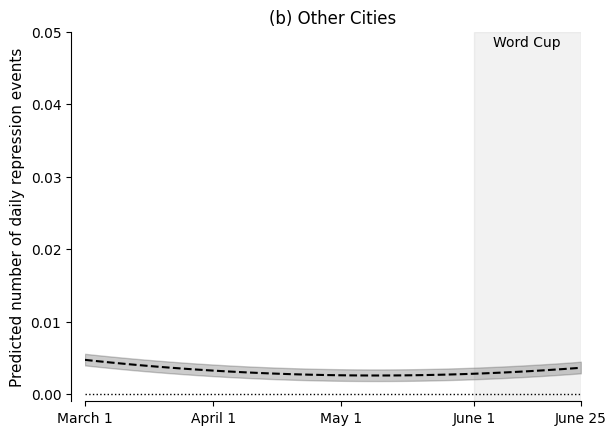

In [39]:
ax = sns.lineplot(data=data_othercity, x="time", y="predict",ci=95,color='black',linestyle='--',n_boot=1000,seed=5)
ax.set_ylim(-0.001, 0.05)
ax.set_xlim(0.01, 1.17)

ax.axvspan(0.92, 1.17, alpha=0.1, color='grey')
plt.text(.96, .99, 'Word Cup', ha='right', va='top', transform=ax.transAxes, fontsize ='medium')

#specify x-axis locations
x_ticks = [0.01, 0.31, 0.61, 0.92, 1.17]
#specify x-axis labels
x_labels = ['March 1', 'April 1', 'May 1', 'June 1', 'June 25'] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set_ylabel(r'Predicted number of daily repression events', fontsize=11)
ax.set_xlabel(r'', fontsize=1)
plt.title("(b) Other Cities")

ax.spines['left'].set_position(('outward', 10))
plt.axhline(y=0.0, xmin=0.0,xmax=1.17, color='black', linestyle='dotted', linewidth=1)

sns.despine()

Graph shows predicted numbers of daily repression events in departments with other departments. Calculations are based on interaction effects of Model 3, Table 1, with control variables held at observed values. Shading around
lines gives 95% confidence intervals. Furthemore, in line with Hypothesis 1, the figure shows that state violence was at a consistently low level in other department. In line with Hypothesis 2, state violence remained unchanged in nonhost cities.

### Enriched Figures

Finally, we will enrich the above figures enrich by plotting also relevant information from the actual data (not predictions).

In [40]:
actual_host_city = df_hostcity[['time','repression']]
actual_other_city = df_othercity[['time','repression']]

In [41]:
actual_host_city=actual_host_city.groupby('time').mean()
actual_host_city = actual_host_city.reset_index()
actual_host_city.head(2)

,time,repression
0,0.010,0.200
1,0.020,0.200


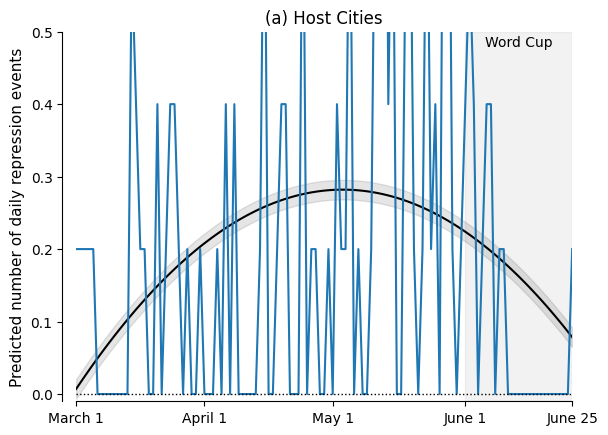

In [42]:
ax = sns.lineplot(data=data, x="time", y="predict",ci=None,color='black')
ax = sns.lineplot(data=actual_host_city, x="time", y="repression",ci=None)

ax.set_ylim(-0.01, 0.5)
ax.set_xlim(0.01, 1.17)

ax.axvspan(0.92, 1.17, alpha=0.1, color='grey')
plt.text(.96, .99, 'Word Cup', ha='right', va='top', transform=ax.transAxes, fontsize ='medium')

#specify x-axis locations
x_ticks = [0.01, 0.31, 0.61, 0.92, 1.17]
#specify x-axis labels
x_labels = ['March 1', 'April 1', 'May 1', 'June 1', 'June 25'] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set_ylabel(r'Predicted number of daily repression events', fontsize=11)
ax.set_xlabel(r'', fontsize=1)
plt.title("(a) Host Cities")

ax.spines['left'].set_position(('outward', 10))
plt.axhline(y=0.0, xmin=0.0,xmax=1.17, color='black', linestyle='dotted', linewidth=1)

#some confidence interval
ci = 1.95 * np.std(data['predict'])/np.sqrt(len(data['time']))

ax.fill_between(data['time'], (data['predict']-ci), (data['predict']+ci), color='black', alpha=.1)

sns.despine()


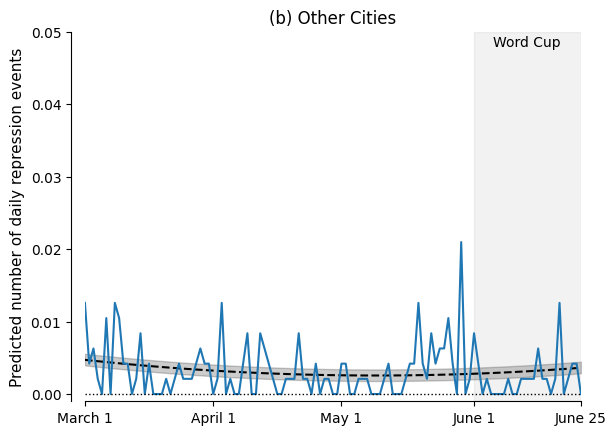

In [43]:
ax = sns.lineplot(data=data_othercity, x="time", y="predict",ci=95,color='black',linestyle='--',n_boot=1000,seed=5)
ax = sns.lineplot(data=actual_other_city, x="time", y="repression",ci=None)

ax.set_ylim(-0.001, 0.05)
ax.set_xlim(0.01, 1.17)

ax.axvspan(0.92, 1.17, alpha=0.1, color='grey')
plt.text(.96, .99, 'Word Cup', ha='right', va='top', transform=ax.transAxes, fontsize ='medium')

#specify x-axis locations
x_ticks = [0.01, 0.31, 0.61, 0.92, 1.17]
#specify x-axis labels
x_labels = ['March 1', 'April 1', 'May 1', 'June 1', 'June 25'] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set_ylabel(r'Predicted number of daily repression events', fontsize=11)
ax.set_xlabel(r'', fontsize=1)
plt.title("(b) Other Cities")

ax.spines['left'].set_position(('outward', 10))
plt.axhline(y=0.0, xmin=0.0,xmax=1.17, color='black', linestyle='dotted', linewidth=1)

sns.despine()

### Task 5: Robustness Check Using a Dichotomous Indicator of Repression

As an additional robustness check, the authors run logistic regressions using a binary outcome variable for regression. They report their results in Table SI.4.5 of the Supplementary Information; We will replicate these results.

<img src=".\Markdown\Table_SI_4_5.png " alt=Table_SI_4_5 style="width: 60%"/>


### Data import
We retrieve all the required data for the analysis of the forth question.

In [44]:
df_ex4 = pd.read_stata(r'.\Datasets\main_data.dta')
df_ex4.head()

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,date,month_date,prewc_time3m,time,time2,time3,time_long,time2_long,time3_long,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,prox_hotelonly,prox_hotelonly_time,prox_hotelonly_time2,prox_hotelonly_time3,prox_hotelpress,prox_hotelpress_time,prox_hotelpress_time2,prox_hotelpress_time3,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,biweek1,biweek2,biweek3,biweek4,biweek5,biweek6,biweek7,biweek8,biweek9,biweek10,biweek11,biweek12,biweek13,biweek14,biweek15,hcXbiweek1,hcXbiweek2,hcXbiweek3,hcXbiweek4,hcXbiweek5,hcXbiweek6,hcXbiweek7,hcXbiweek8,hcXbiweek9,hcXbiweek10,hcXbiweek11,hcXbiweek12,hcXbiweek13,hcXbiweek14,hcXbiweek15,zone1,zone2,zone3,zone4,zone5,prov1,prov2,prov3,prov4,prov5,prov6,prov7,prov8,prov9,prov10,prov11,prov12,prov13,prov14,prov15,prov16,prov17,prov18,prov19,prov20,prov21,prov22,prov23,prov24,subzone1,subzone2,subzone3,subzone4,subzone5,subzone6,subzone7,subzone8,subzone9,subzone10,subzone11,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-01,1978-01-01,NaN,NaN,NaN,NaN,0.010,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-02,1978-01-01,NaN,NaN,NaN,NaN,0.020,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-03,1978-01-01,NaN,NaN,NaN,NaN,0.030,0.001,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-04,1978-01-01,NaN,NaN,NaN,NaN,0.040,0.002,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-05,1978-01-01,NaN,NaN,NaN,NaN,0.050,0.003,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50

### Understanding Logistic Regression

Logistic regression is the type of regression analysis used to find the probability of a certain event occurring. It is the best suited type of regression for cases where we have a categorical dependent variable which can take only discrete values.

Statsmodels is a Python module that provides various functions for estimating different statistical models and performing statistical tests.

* First, we define the set of dependent(y) and independent(X) variables.
* Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

### Table SI.4.5: Model 1

In [45]:
# Drop NA values
df_ex4_model1 = df_ex4[df_ex4['time'].notna()]
df_ex4_model1 = df_ex4_model1[df_ex4_model1['dumrepression'].notna()]
X= df_ex4_model1[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2']] 
Y= df_ex4_model1['dumrepression']

# Add Constanst 
X = sm.add_constant(X)

# Initialize X and Y
model_ex4_1 = sm.Logit(Y, X).fit(cov_type="HC1")

model_ex4_1.summary()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Dec 2022   Pseudo R-squ.:                  0.1533
Time:                        14:20:14   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:                  HC1   LLR p-value:                 4.467e-85
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.8507      0.267    -21.934      0.000      -6.373      -5.328
hostcitytime      4.1403      2.081      1.990      0.047       0.062       8.219
hostcitytime2    -3.2143      1.600     -2.009      0.045      -6.350      -0.078
hostcity          3.1376      0.576      5.448      0.000       2.009       4.266
time             -0.8733      1.067     -0.818      0.413      -2.966       1.219
time2             0.5355      0.864      0.620      0.535      -1.157       2.228
=================================================================================
"""

In [46]:
R = np.eye(len(model_ex4_1.params))[1:len(model_ex4_1.params)]
model_ex4_1.wald_test(R).summary()

'<Wald test (chi2): statistic=[[712.20480276]], p-value=1.1278369549374486e-151, df_denom=5>'

In the output, 'Iterations' refer to the number of times the model iterates over the data, trying to optimize the model. By default, the maximum number of iterations performed is 35, after which the optimization fails.

Explanation of some of the terms in the summary table:

* **coef** : the coefficients of the independent variables in the regression equation.
* **Log-Likelihood** : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
* **LL-Null** : the value of log-likelihood of the model when no independent variable is included (only an intercept is included).
* **Pseudo R-squ.**: a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model. This value can range from 0 to 1, with higher values indicating a better model fit.


We observe that we replicate the Model 1 from the Table SI.4.5, below we compare our result with the corresponding results of Table SI.4.5 .

|Parameters Results | Parameters   |Table SI.4.5: Model 1         | Our Approach: Model 1        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time | 4.140 | 4.1403	 |
|std err|  Host City * Time | 2.081|2.081	 |
|coef|  Host City * Time2 | −3.214 | -3.2143 |
|std err|  Host City * Time2 |1.600| 1.600		 |
|coef|  Host City |   3.138  | 3.1376 |
|std err|  Host City |0.576| 0.576		 |
|coef|  Time |  −0.873   | -0.8733		 |
|std err|  Time |1.068| 1.067	 |
|coef|  Time2 |  0.535   | 0.0020 |
|std err|  Time2 |0.864| 0.002	 |
|coef|  Constant |  −5.851 | 0.5355 |
|std err|  Constant |0.267| 0.864 |


|Results |Table SI.4.5: Model 1         | Our Approach: Model 1        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|Wald $\chi^{2}$ |   712.19    |712.20480276 |
|Pseudo $R^2$ |  0.15 | 0.1533 |
|Observations|  58107 | 58107 |



We notice that Pseudo R-sqr. is 0.15, which is quite low. This tells us that the predictor variables in the model don’t do a very good job of predicting the value of the response variable.

### Table SI.4.5: Model 2

In [47]:
# Drop NA values
df_ex4_model2 = df_ex4[df_ex4['time'].notna()]
df_ex4_model2 = df_ex4_model2[df_ex4_model2['lnrepression'].notna()]
df_ex4_model2 = df_ex4_model2[df_ex4_model2['lnpop_1970'].notna()]
df_ex4_model2 = df_ex4_model2[df_ex4_model2['vote_frejuli'].notna()]
df_ex4_model2 = df_ex4_model2[df_ex4_model2['literacy_avg'].notna()]

# Initialize X and Y
X_model_ex4_2= df_ex4_model2[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77']] 
Y_model_ex4_2= df_ex4_model2['dumrepression']

# Add Constanst 
X_model_ex4_2 = sm.add_constant(X_model_ex4_2)

model_ex4_2 = sm.Logit(Y_model_ex4_2, X_model_ex4_2).fit(cov_type="HC1")

model_ex4_2.summary()

Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56383
Method:                           MLE   Df Model:                           10
Date:                Sat, 17 Dec 2022   Pseudo R-squ.:                  0.4027
Time:                        14:20:14   Log-Likelihood:                -779.73
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC1   LLR p-value:                1.601e-219
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -17.2479      3.181     -5.422      0.000     -23.482     -11.013
hostcitytime          4.8685      2.119      2.297      0.022       0.715       9.023
hostcitytime2        -3.7977      1.647     -2.305      0.021      -7.026      -0.569
hostcity             -1.6274      0.628     -2.591      0.010      -2.859      -0.396
time                 -0.9927      1.088     -0.912      0.362      -3.126       1.140
time2                 0.6181      0.882      0.701      0.484      -1.111       2.347
lnpop_1970            0.8683      0.224      3.875      0.000       0.429       1.308
vote_frejuli          0.0061      0.014      0.450      0.653      -0.020       0.033
literacy_avg         -0.2055      3.172     -0.065      0.948      -6.422       6.011
lnrebact1974          0.0486      0.078      0.626      0.531      -0.104       0.201
lnrepression70_77     0.5776      0.141      4.100      0.000       0.301       0.854
=====================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [48]:
R2 = np.eye(len(model_ex4_2.params))[1:len(model_ex4_2.params)]
model_ex4_2.wald_test(R2).summary()

'<Wald test (chi2): statistic=[[637.22373665]], p-value=1.848969221604686e-130, df_denom=10>'

We observe that we replicate the Model 2 from the Table SI.4.5, below we compare our result with the corresponding results of Table SI.4.5 .

|Parameters Results | Parameters   |Table SI.4.5: Model 2         | Our Approach: Model 2        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time | 4.869 | 4.8685		 |
|std err|  Host City * Time | 2.119|2.119		 |
|coef|  Host City * Time2 | -3.798 | -3.7977 |
|std err|  Host City * Time2 |1.647| 1.647	 |
|coef|  Host City |  -1.627 | -1.6274	 |
|std err|  Host City |0.628|0.628		 |
|coef|  Time |  −0.993   | -0.9927	 |
|std err|  Time |1.088| 1.088	 |
|coef|  Time2 |   0.618   | 0.6181	 |
|std err|  Time2 |0.882| 0.882	 |
|coef|  Constant |  −17.248 | -17.2479 |
|std err|  Constant |3.181| 3.181 |


|Results |Table SI.4.5: Model 2       | Our Approach: Model 2        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|Wald $\chi^{2}$ |   637.21   |637.22373665 |
|Pseudo $R^2$ |  0.40 | 0.4027 |
|Observations|   56394 | 56394 |


We notice that Pseudo R-sqr. is 0.4027, which is quite better that the first model but is still quite low. This tells us that the predictor variables in the model don’t do a very good job of predicting the value of the response variable.

### Table SI.4.5: Model 3

In [49]:
# Drop NA values
df_ex_4_model3 = df_ex4[df_ex4['time'].notna()]
df_ex_4_model3 = df_ex_4_model3[df_ex_4_model3['lnrepression'].notna()]
df_ex_4_model3 = df_ex_4_model3[df_ex_4_model3['lnpop_1970'].notna()]
df_ex_4_model3 = df_ex_4_model3[df_ex_4_model3['vote_frejuli'].notna()]
df_ex_4_model3 = df_ex_4_model3[df_ex_4_model3['literacy_avg'].notna()]

# Initialize X and Y
X_model3_ex4= df_ex_4_model3[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5']] 
Y_model3_ex4= df_ex_4_model3['dumrepression']

# Add Constanst 
X_model3_ex4 = sm.add_constant(X_model3_ex4)

model3_ex4 = sm.Logit(Y_model3_ex4, X_model3_ex4).fit(cov_type="HC1")

model3_ex4.summary()

Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56379
Method:                           MLE   Df Model:                           14
Date:                Sat, 17 Dec 2022   Pseudo R-squ.:                  0.4138
Time:                        14:20:15   Log-Likelihood:                -765.25
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC1   LLR p-value:                9.017e-222
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.4018      3.161     -4.873      0.000     -21.597      -9.207
hostcitytime          5.3781      2.267      2.373      0.018       0.935       9.821
hostcitytime2        -4.2173      1.774     -2.378      0.017      -7.694      -0.741
hostcity             -1.3273      0.690     -1.924      0.054      -2.679       0.025
time                 -0.9924      1.086     -0.914      0.361      -3.121       1.136
time2                 0.6179      0.880      0.702      0.483      -1.107       2.343
lnpop_1970            0.7459      0.215      3.470      0.001       0.325       1.167
vote_frejuli          0.0200      0.015      1.323      0.186      -0.010       0.050
literacy_avg         -0.1268      3.041     -0.042      0.967      -6.088       5.834
lnrebact1974         -0.1315      0.080     -1.635      0.102      -0.289       0.026
lnrepression70_77     0.5452      0.155      3.519      0.000       0.242       0.849
zone2                -1.9991      0.450     -4.445      0.000      -2.881      -1.118
zone3                -0.9832      0.272     -3.610      0.000      -1.517      -0.449
zone4                -0.1626      0.260     -0.625      0.532      -0.673       0.347
zone5                -0.7864      0.485     -1.623      0.105      -1.736       0.163
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [50]:
R3 = np.eye(len(model3_ex4.params))[1:len(model3_ex4.params)]
model3_ex4.wald_test(R3).summary()

'<Wald test (chi2): statistic=[[791.3102168]], p-value=7.986512613482488e-160, df_denom=14>'

We observe that we replicate the Model 3 from the Table SI.4.5, below we compare our result with the corresponding results of Table SI.4.5 .

|Parameters Results | Parameters   |Table SI.4.5: Model 3         | Our Approach: Model 3        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time | 5.378 | 5.3781		 |
|std err|  Host City * Time | 2.267|2.267		 |
|coef|  Host City * Time2 | −4.217 | -4.2173 |
|std err|  Host City * Time2 |1.774| 1.774	 |
|coef|  Host City |  −1.327 | -1.3273		 |
|std err|  Host City |0.690|0.690		 |
|coef|  Time |  −0.992   | -0.9924	 |
|std err|  Time |1.086| 1.086	 |
|coef|  Time2 |   0.618   | 0.6179		 |
|std err|  Time2 |0.880| 0.880	 |
|coef|  Constant |  −15.402 | -15.4018 |
|std err|  Constant |3.161| 3.161 |


|Results |Table SI.4.5: Model 3       | Our Approach: Model 3        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|Wald $\chi^{2}$ |   791.30   |791.3102168 |
|Pseudo $R^2$ |  0.41 | 0.4138 |
|Observations|   56394 | 56394 |


We notice that Pseudo R-sqr. is 0.4027, which is quite better that the others models but is still quite low. This tells us that the predictor variables in the model don’t do a very good job of predicting the value of the response variable.

To sum up, in line with Hypothesis 1, the coefficients of the interactions between Host City and Time are positive and
statistically significant. In line with Hypothesis 2, the coefficients of the interaction
between Host City and Time2 are negative and statistically significant. Together, this
shows that our findings are robust to potential reporting biases in repression events.

### Task 5: Robustness Check Using Matched Samples

Another robustness check that the authors have undertaken is to run regression analyses on matched samples. They have created subsets of the data that pair similar departments with and without host cities. The matching has been carried out both manually, by using the range of population size, and algorithmically. We will focus on the simple, manual matching.

We will replicate table SI.4.7 of the Supplementary Information and we recreate Figure 6 of the main paper.


| Table SI.4.7          | Table Figure 6          |
|:-----------------------------:|:-----------------------------:|
| <img src=".\Markdown\Table_SI_4_7.png" alt="Table_SI_4_7" style="width: 100%">  |<img src=".\Markdown\Figure_6.png" alt='Figure_6' style="width: 100%">  |

### Data import
We retrieve all the required data for the analysis of the fifth question.

In [51]:
df = pd.read_stata(r'.\Datasets\main_data.dta')
df.head()

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,date,month_date,prewc_time3m,time,time2,time3,time_long,time2_long,time3_long,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,prox_hotelonly,prox_hotelonly_time,prox_hotelonly_time2,prox_hotelonly_time3,prox_hotelpress,prox_hotelpress_time,prox_hotelpress_time2,prox_hotelpress_time3,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,biweek1,biweek2,biweek3,biweek4,biweek5,biweek6,biweek7,biweek8,biweek9,biweek10,biweek11,biweek12,biweek13,biweek14,biweek15,hcXbiweek1,hcXbiweek2,hcXbiweek3,hcXbiweek4,hcXbiweek5,hcXbiweek6,hcXbiweek7,hcXbiweek8,hcXbiweek9,hcXbiweek10,hcXbiweek11,hcXbiweek12,hcXbiweek13,hcXbiweek14,hcXbiweek15,zone1,zone2,zone3,zone4,zone5,prov1,prov2,prov3,prov4,prov5,prov6,prov7,prov8,prov9,prov10,prov11,prov12,prov13,prov14,prov15,prov16,prov17,prov18,prov19,prov20,prov21,prov22,prov23,prov24,subzone1,subzone2,subzone3,subzone4,subzone5,subzone6,subzone7,subzone8,subzone9,subzone10,subzone11,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-01,1978-01-01,NaN,NaN,NaN,NaN,0.010,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-02,1978-01-01,NaN,NaN,NaN,NaN,0.020,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-03,1978-01-01,NaN,NaN,NaN,NaN,0.030,0.001,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-04,1978-01-01,NaN,NaN,NaN,NaN,0.040,0.002,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50.400,5.037,1.099,-37.199,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.000,buenos aires,1.000,adolfo alsina buenos aires,0.000,0.000,0.000,0.000,NaN,1978-01-05,1978-01-01,NaN,NaN,NaN,NaN,0.050,0.003,0.000,NaN,NaN,NaN,0.000,0.000,0.000,6.274,NaN,NaN,NaN,6.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.920,0.801,50

In [52]:
df_matched=df[df['matched_simple']==1]

### Table SI.4.7: Model 1

In [53]:
# Drop NA values
df_model1 = df_matched[df['time'].notna()]
df_model1 = df_model1[df_model1['lnrepression'].notna()]

# Initialize X and Y
X= df_model1[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2']] 
Y= df_model1['lnrepression']

# Add Constanst 
X = sm.add_constant(X)

model1 = sm.OLS(Y, X).fit(cov_type="HC1")
model1.summary()

C:\Users\ΑΝΤΩΝΙΟΣ ΜΑΥΡΙΔΗΣ\AppData\Local\Temp\ipykernel_16324\3571551720.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.554
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           4.53e-08
Time:                        14:20:18   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0292      0.008      3.446      0.001       0.013       0.046
hostcitytime      0.4239      0.148      2.868      0.004       0.134       0.714
hostcitytime2    -0.3405      0.113     -3.005      0.003      -0.563      -0.118
hostcity         -0.0064      0.035     -0.182      0.856      -0.075       0.063
time             -0.0255      0.031     -0.810      0.418      -0.087       0.036
time2             0.0196      0.025      0.785      0.433      -0.029       0.068
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.123
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

We observe that we replicate the Model 1 from the Table SI.4.7, below we compare our result with the corresponding results of Table SI.4.7.

|Parameters Results | Parameters   |Table SI.4.7: Model 1        | Our Approach: Model 1        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time |  0.424 | 0.4239	 |
|std err|  Host City * Time | 0.148| 0.148 |
|coef|  Host City * Time2 | −0.341 | -0.3405 |
|std err|  Host City * Time2 |0.113| 0.113		 |
|coef|  Host City | −0.006  |-0.0064	 |
|std err|  Host City |0.035| 0.035	 |
|coef|  Time |  −0.026  | 	-0.0255		 |
|std err|  Time |0.031| 0.031	 |
|coef|  Time2 | 0.020  | 0.0196	 |
|std err|  Time2 | 0.025  | 0.025	 |
|coef|  Constant |  0.029 | 0.0292	|
|std err|  Constant |0.008| 0.008	 |


|Results |Table SI.4.7: Model 1       | Our Approach: Model 1        |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|F statistic|  8.55 | 8.554 |
|$R^2$ |  0.03 | 0.033|
|Observations|   4095 | 4095 |

### Table SI.4.7: Model 2

In [54]:
# Drop NA values
df_model2 = df_matched[df_matched['time'].notna()]
df_model2 = df_model2[df_model2['lnrepression'].notna()]
df_model2 = df_model2[df_model2['lnpop_1970'].notna()]
df_model2 = df_model2[df_model2['vote_frejuli'].notna()]
df_model2 = df_model2[df_model2['literacy_avg'].notna()]


# Initialize X and Y
X_model2= df_model2[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77']] 
Y_model2= df_model2['lnrepression']

# Add Constanst 
X_model2 = sm.add_constant(X_model2)

model2 = sm.OLS(Y_model2, X_model2).fit(cov_type="HC1")
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.82e-22
Time:                        14:20:18   Log-Likelihood:                 1394.7
No. Observations:                4095   AIC:                            -2767.
Df Residuals:                    4084   BIC:                            -2698.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9371      0.141     -6.668      0.000      -1.213      -0.662
hostcitytime          0.4239      0.135      3.132      0.002       0.159       0.689
hostcitytime2        -0.3405      0.105     -3.250      0.001      -0.546      -0.135
hostcity             -0.1001      0.035     -2.896      0.004      -0.168      -0.032
time                 -0.0255      0.031     -0.817      0.414      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
lnpop_1970            0.0867      0.011      8.218      0.000       0.066       0.107
vote_frejuli         -0.0014      0.001     -2.732      0.006      -0.002      -0.000
literacy_avg          0.0089      0.087      0.102      0.919      -0.162       0.180
lnrebact1974         -0.0049      0.002     -2.790      0.005      -0.008      -0.001
lnrepression70_77    -0.0029      0.002     -1.296      0.195      -0.007       0.002
==============================================================================
Omnibus:                     4103.436   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186868.746
Skew:                           5.032   Prob(JB):                         0.00
Kurtosis:                      34.527   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We observe that we replicate the Model 2 from the Table SI.4.7, below we compare our result with the corresponding results of Table SI.4.7.

|Parameters Results | Parameters   |Table SI.4.7: Model 2        | Our Approach: Model 2      |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time |  0.424 | 0.4239	 |
|std err|  Host City * Time |0.135| 0.135|
|coef|  Host City * Time2 | −0.341 | -0.3405 |
|std err|  Host City * Time2 |0.105| 0.105		 |
|coef|  Host City | −0.100 |-0.1001	 |
|std err|  Host City |0.035| 0.035	 |
|coef|  Time |  −0.026  | 	-0.0255		 |
|std err|  Time |0.031| 0.031	 |
|coef|  Time2 | 0.020  | 0.0196	 |
|std err|  Time2 | 0.025  | 0.025	 |
|coef|  Constant | −0.937| -0.9371		|
|std err|  Constant |0.141| 0.141	 |


|Results |Table SI.4.7: Model 2       | Our Approach: Model 2       |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|F statistic|  12.90 | 12.90 |
|$R^2$ |  0.10 | 0.098|
|Observations|   4095 | 4095 |

### Table SI.4.7: Model 3

In [55]:
# Drop NA values
df_model3 = df_matched[df_matched['time'].notna()]
df_model3 = df_model3[df_model3['lnrepression'].notna()]
df_model3 = df_model3[df_model3['lnpop_1970'].notna()]
df_model3 = df_model3[df_model3['vote_frejuli'].notna()]
df_model3 = df_model3[df_model3['literacy_avg'].notna()]


# Initialize X and Y
X_model3= df_model3[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5']] 
Y_model3= df_model3['lnrepression']

# Add Constanst 
X_model3 = sm.add_constant(X_model3)

model3 = sm.OLS(Y_model3, X_model3).fit(cov_type="HC1")
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.48
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           9.72e-24
Time:                        14:20:18   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9783      0.172     -5.701      0.000      -1.315      -0.642
hostcitytime          0.4239      0.131      3.241      0.001       0.168       0.680
hostcitytime2        -0.3405      0.102     -3.344      0.001      -0.540      -0.141
hostcity             -0.0766      0.033     -2.347      0.019      -0.141      -0.013
time                 -0.0255      0.031     -0.818      0.413      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
lnpop_1970            0.0872      0.011      7.761      0.000       0.065       0.109
vote_frejuli         -0.0009      0.001     -1.575      0.115      -0.002       0.000
literacy_avg          0.2092      0.102      2.045      0.041       0.009       0.410
lnrebact1974         -0.0204      0.003     -6.641      0.000      -0.026      -0.014
lnrepression70_77    -0.0160      0.004     -4.168      0.000      -0.024      -0.008
zone2                -0.1095      0.013     -8.699      0.000      -0.134      -0.085
zone3                -0.0857      0.011     -7.639      0.000      -0.108      -0.064
zone4                -0.0162      0.009     -1.854      0.064      -0.033       0.001
zone5                -0.0682      0.010     -6.635      0.000      -0.088      -0.048
==============================================================================
Omnibus:                     4026.867   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177134.365
Skew:                           4.887   Prob(JB):                         0.00
Kurtosis:                      33.702   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We observe that we replicate the Model 3 from the Table SI.4.7, below we compare our result with the corresponding results of Table SI.4.7.

|Parameters Results | Parameters   |Table SI.4.7: Model 3        | Our Approach: Model 3      |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|coef|  Host City * Time |  0.424 | 0.4239	 |
|std err|  Host City * Time |0.131| 0.131|
|coef|  Host City * Time2 | −0.341 | -0.3405 |
|std err|  Host City * Time2 |0.102| 0.102		 |
|coef|  Host City | −0.077 |-0.0766 |
|std err|  Host City |0.033| 0.033	 |
|coef|  Time |  −0.026  | 	-0.0255		 |
|std err|  Time |0.031| 0.031	 |
|coef|  Time2 | 0.020  | 0.0196	 |
|std err|  Time2 | 0.025  | 0.025	 |
|coef|  Constant | −0.978| -0.9371		|
|std err|  Constant |0.172| 0.141	 |


|Results |Table SI.4.7: Model 3       | Our Approach: Model 3       |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
|F statistic|  10.48 | 10.48 |
|$R^2$ |  0.12 | 0.120|
|Observations|   4095 | 4095 |

Using all three matched samples, we
re-run our main analysis with negative binomial regressions and linear OLS regressions. Our results show that our findings remain substantively unchanged.

### Figure 6

### Matched Host Cities

In [56]:
df_allhost=df[df['matched_allhosts']==1]
df_host=df_allhost[df_allhost['hostcity']==1]

In [57]:
# Drop NA values
df_model_fig6 = df_host[df_host['time'].notna()]
df_model_fig6 = df_model_fig6[df_model_fig6['lnrepression'].notna()]
df_model_fig6 = df_model_fig6[df_model_fig6['lnpop_1970'].notna()]
df_model_fig6 = df_model_fig6[df_model_fig6['vote_frejuli'].notna()]
df_model_fig6 = df_model_fig6[df_model_fig6['literacy_avg'].notna()]

# Initialize X and Y
X_model_fig6= df_model_fig6[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5']] 
Y_model_fig6= df_model_fig6['lnrepression']

# Add Constanst 
X_model_fig6= sm.add_constant(X_model_fig6,has_constant='add')
model_fig6 = sm.OLS(Y_model_fig6, X_model_fig6).fit(cov_type="HC1")

model_fig6.summary()

C:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
C:\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     12.99
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.45e-15
Time:                        14:20:19   Log-Likelihood:                -84.988
No. Observations:                 585   AIC:                             184.0
Df Residuals:                     578   BIC:                             214.6
Df Model:                           6                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0051      0.002     -2.218      0.027      -0.010      -0.001
hostcitytime          0.1992      0.062      3.209      0.001       0.078       0.321
hostcitytime2        -0.1605      0.049     -3.264      0.001      -0.257      -0.064
hostcity             -0.0051      0.002     -2.218      0.027      -0.010      -0.001
time                  0.1992      0.062      3.209      0.001       0.078       0.321
time2                -0.1605      0.049     -3.264      0.001      -0.257      -0.064
lnpop_1970            0.0436      0.011      4.125      0.000       0.023       0.064
vote_frejuli         -0.0192      0.003     -6.989      0.000      -0.025      -0.014
literacy_avg         -0.0035      0.002     -1.652      0.098      -0.008       0.001
lnrebact1974         -0.0113      0.009     -1.230      0.219      -0.029       0.007
lnrepression70_77     0.0698      0.014      4.919      0.000       0.042       0.098
zone2                 0.0331      0.013      2.546      0.011       0.008       0.059
zone3                -0.0348      0.011     -3.147      0.002      -0.056      -0.013
zone4                      0          0        nan        nan           0           0
zone5                      0          0        nan        nan           0           0
==============================================================================
Omnibus:                      304.075   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2025.406
Skew:                           2.248   Prob(JB):                         0.00
Kurtosis:                      10.930   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
predict = model_fig6.predict(X_model_fig6)
predict = predict.to_frame()
predict.index.name = 'index'
predict.rename(columns={predict.columns[0]:'predict'}, inplace=True)
X_test = X_model_fig6['time'].to_frame()
X_test.index.name = 'index'
data_fig6= pd.merge(X_test, predict, left_on='index', right_on='index',how="inner")
data_fig6.head()

,time,predict
index,,
11583,0.010,-0.031
11584,0.020,-0.027
11585,0.030,-0.023
11586,0.040,-0.019
11587,0.050,-0.016


In [59]:
data_fig6=data_fig6.groupby('time').mean()
data_fig6 = data_fig6.reset_index()
data_fig6.head(2)

,time,predict
0,0.010,0.027
1,0.020,0.031


### Matched Other Cities

In [60]:
df_allhost=df[df['matched_allhosts']==1]
df_other_cities=df_allhost[df_allhost['hostcity']==0]

In [61]:
# Drop NA values
df_model_fig6_other = df_other_cities[df_other_cities['time'].notna()]
df_model_fig6_other = df_model_fig6_other[df_model_fig6_other['lnrepression'].notna()]
df_model_fig6_other = df_model_fig6_other[df_model_fig6_other['lnpop_1970'].notna()]
df_model_fig6_other = df_model_fig6_other[df_model_fig6_other['vote_frejuli'].notna()]
df_model_fig6_other = df_model_fig6_other[df_model_fig6_other['literacy_avg'].notna()]

# Initialize X and Y
X_model_fig6_other= df_model_fig6_other[[ 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974' ,'lnrepression70_77','zone2','zone3','zone4','zone5']] 
Y_model_fig6_other= df_model_fig6_other['lnrepression']

# Add Constanst 
X_model_fig6_other= sm.add_constant(X_model_fig6_other,has_constant='add')
model_fig6_other = sm.OLS(Y_model_fig6_other, X_model_fig6_other).fit(cov_type="HC1")

model_fig6_other.summary()

C:\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.745
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.25e-12
Time:                        14:20:19   Log-Likelihood:                 445.20
No. Observations:                1638   AIC:                            -868.4
Df Residuals:                    1627   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5673      2.619     -0.980      0.327      -7.700       2.565
hostcitytime      -1.053e-13   1.08e-13     -0.976      0.329   -3.17e-13    1.06e-13
hostcitytime2     -2.936e-14    3.1e-14     -0.947      0.344   -9.01e-14    3.14e-14
hostcity          -3.696e-15   3.67e-15     -1.008      0.314   -1.09e-14    3.49e-15
time                 -0.0670      0.061     -1.098      0.272      -0.187       0.053
time2                 0.0467      0.047      0.990      0.322      -0.046       0.139
lnpop_1970            0.0568      0.044      1.297      0.195      -0.029       0.143
vote_frejuli          0.0005      0.002      0.300      0.764      -0.003       0.004
literacy_avg          0.0070      0.297      0.023      0.981      -0.575       0.589
lnrebact1974          0.3624      0.477      0.760      0.447      -0.572       1.296
lnrepression70_77     0.0094      0.025      0.380      0.704      -0.039       0.058
zone2                      0          0        nan        nan           0           0
zone3                 0.7558      1.032      0.732      0.464      -1.267       2.779
zone4                -0.0108      0.019     -0.568      0.570      -0.048       0.027
zone5                -0.0075      0.031     -0.237      0.813      -0.069       0.054
==============================================================================
Omnibus:                     1634.618   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60724.992
Skew:                           4.961   Prob(JB):                         0.00
Kurtosis:                      31.130   Cond. No.                     6.77e+34
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 1.22e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
predict_other = model_fig6_other.predict(X_model_fig6_other)
predict_other = predict_other.to_frame()
predict_other.index.name = 'index'
predict_other.rename(columns={predict_other.columns[0]:'predict'}, inplace=True)
X_test_other = X_model_fig6_other['time'].to_frame()
X_test_other.index.name = 'index'
data_fig6_other= pd.merge(X_test_other, predict_other, left_on='index', right_on='index',how="inner")
data_fig6_other.head()

,time,predict
index,,
1399,0.010,0.065
1400,0.020,0.064
1401,0.030,0.063
1402,0.040,0.063
1403,0.050,0.062


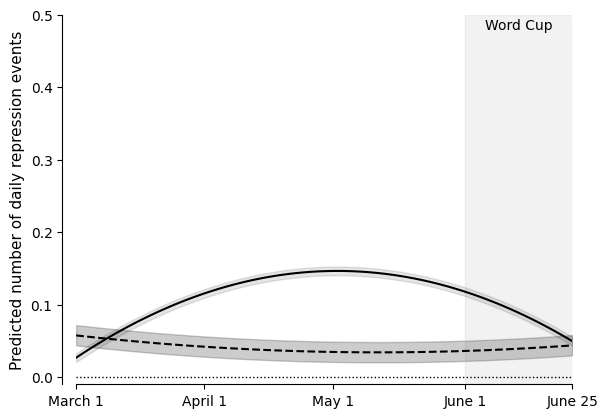

In [63]:
ax = sns.lineplot(data=data_fig6, x="time", y="predict",color='black')
ax = sns.lineplot(data=data_fig6_other, x="time", y="predict",ci=95,color='black',linestyle='--',n_boot=1000,seed=5)
ax.set_ylim(-0.01, 0.5)
ax.set_xlim(0.01, 1.17)

ax.axvspan(0.92, 1.17, alpha=0.1, color='grey')
plt.text(.96, .99, 'Word Cup', ha='right', va='top', transform=ax.transAxes, fontsize ='medium')

#specify x-axis locations
x_ticks = [0.01, 0.31, 0.61, 0.92, 1.17]
#specify x-axis labels
x_labels = ['March 1', 'April 1', 'May 1', 'June 1', 'June 25'] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

ax.set_ylabel(r'Predicted number of daily repression events', fontsize=11)
ax.set_xlabel(r'', fontsize=1)

#some confidence interval
ci = 1.95 * np.std(data_fig6['predict'])/np.sqrt(len(data_fig6['time']))

ax.fill_between(data_fig6['time'], (data_fig6['predict']-ci), (data_fig6['predict']+ci), color='black', alpha=.1)


ax.spines['left'].set_position(('outward', 10))
plt.axhline(y=0.0, xmin=0.0,xmax=1.17, color='black', linestyle='dotted', linewidth=1)


sns.despine()